<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [5]:
function binomial_p(n, k, p)
    temp_variable = (factorial(n)/(factorial(k)*factorial(n-k)))*(p^k)*((1-p)^(n-k))
end

binomial_p (generic function with 1 method)

In [6]:
binomial_p(10,2,0.4)

0.12093235199999998

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [10]:
P_W = binomial_p(10, 5, 0.4)
"The chance of winning the bet is $P_W"

"The chance of winning the bet is 0.20065812480000003"

The chance of losing the bet:

In [12]:
P_L = 1 - binomial_p(10, 5, 0.4)
"The chance of losing the bet is $P_L"

"The chance of losing the bet is 0.7993418752"

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [ ]:
# You would expect yourself to lose money in the game. The odds are astronomically not in your favor to win. 

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [17]:
P_winning = binomial_p(10, 4, 0.4)
P_losing = 1 - binomial_p(10, 4, 0.4)
"The chance of earning money is $P_winning and the chance of losing money is $P_losing"

"The chance of earning money is 0.250822656 and the chance of losing money is 0.749177344"

In [ ]:
# You would still expect yourself to lose money in this case. The odds are still favored towards you losing.

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [18]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

    Updating registry at `C:\Users\ahsra\.julia\registries\General.toml`
   Resolving package versions...
    Updating `C:\Users\ahsra\.julia\environments\v1.8\Project.toml`
  [10745b16] + Statistics
  No Changes to `C:\Users\ahsra\.julia\environments\v1.8\Manifest.toml`


In [2]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [16]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

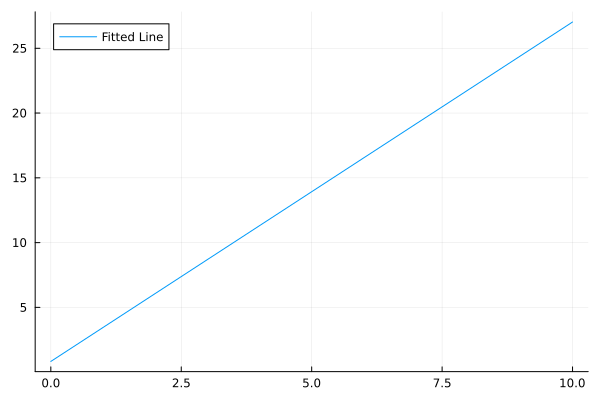

In [17]:
using Statistics, Plots, Distributions
using Polynomials: Polynomial, fit, coeffs
line_fit = Polynomials.fit(x, y_observed, 1)
fit_coeff = coeffs(line_fit)
y_fit = fit_coeff[1] .+ fit_coeff[2] .* x
plot(x, y_fit, label = "Fitted Line")

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [18]:
function chisqr(b,m,x,y_observed,sigma)
    sum((y_observed .- ((m .* x) .+ b)).^2)./(sigma.^2)
end

chisqr (generic function with 1 method)

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [19]:
using Statistics, Plots, Distributions
using Polynomials: Polynomial, fit, coeffs
chi2_list = []
for i in 1:10000
    noise = Random.rand(di.Normal(0,sigma),length(x))
    y_observed = y_true .+ noise;
    line_fit = Polynomials.fit(x, y_observed, 1)
    fit_coeff = coeffs(line_fit)
    push!(chi2_list, chisqr(fit_coeff[1], fit_coeff[2], x, y_observed, sigma))
end
chi2_list

10000-element Vector{Any}:
  4.440569666215526
 16.01155685957643
 12.12081662038208
 12.242376596888239
  9.509945004747557
  2.4166495431360997
  7.790964878795155
 12.770123965568779
  4.784992684243256
  6.475744977040542
 15.587041031772296
 13.579977811755558
  9.330427873630219
  ⋮
  9.082775635737649
  9.100537588183721
 12.813463436574027
  8.755463728240894
  6.692176748243029
 10.506987263145577
  9.049101794641768
  7.818866246239153
 15.298919686586313
 13.849940051814787
  6.942678451074052
 10.38640156574027

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [20]:
mean(chi2_list)

9.004954002975126

The mean is about 9, which makes sense because we know the mean should roughly be the number of observed data points (11) subtracted by the number of coefficients (2). Thus, we get a mean of 11 - 2 = 9, so it checks out.

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

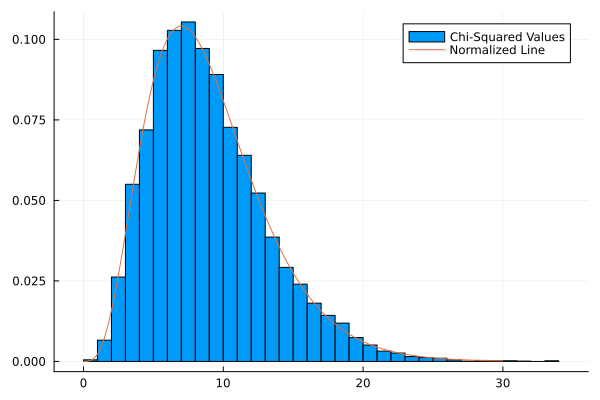

In [21]:
x_dist = 0:0.1:30
histogram(chi2_list, bins = 50, normalize = true, label = "Chi-Squared Values")
plot!(x_dist, di.pdf.(di.Chisq(length(y_observed) - length(fit_coeff)), x_dist), label = "Normalized Line")

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


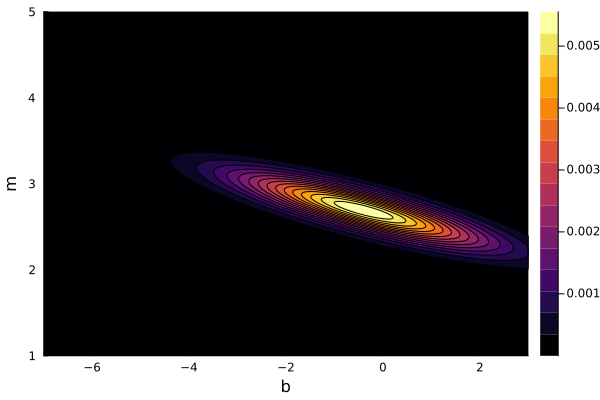

In [23]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
m_range = 1:0.01:5
b_range = -7:0.01:3
contourf(b_range, m_range, p_chi2poly, xlabel = "b", ylabel = "m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

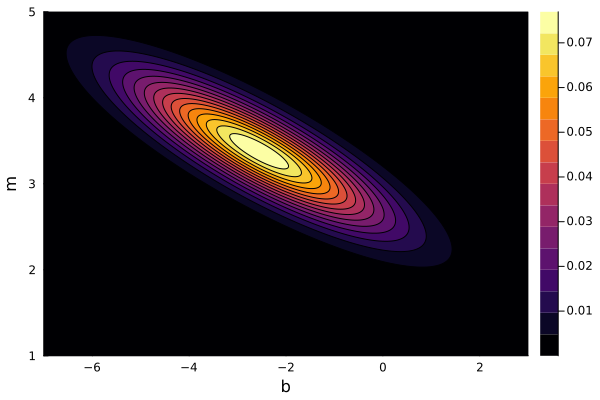

In [28]:
x = 0:0.5:5
noise = Random.rand(di.Normal(0,sigma),length(x))
y_true = 3 .* x .- 2
y_observed = y_true .+ noise;
contourf(b_range, m_range, p_chi2poly, xlabel = "b", ylabel = "m")

The newer plot has a larger radius and is much fatter than the original plot. Additionally, it is shifted more to the left and up compared to the original plot. The center also has a higher intensity/color than the first plot.


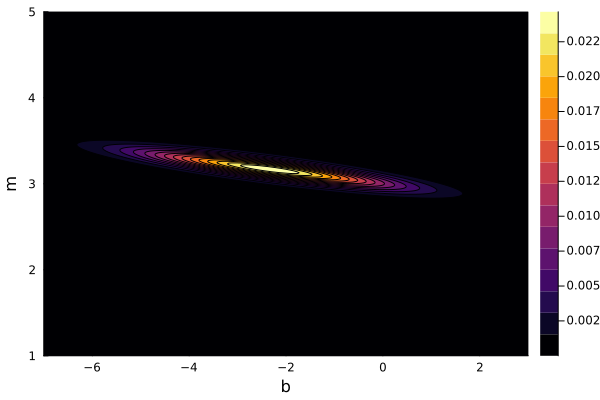

In [31]:
x = 0:2:20
noise = Random.rand(di.Normal(0,sigma),length(x))
y_true = 3 .* x .- 2
y_observed = y_true .+ noise;
contourf(b_range, m_range, p_chi2poly, xlabel = "b", ylabel = "m")

This graph is much skinner and has a lower radius compared to the original graph. Additionally, the center has a much higher intensity/color than the original graph.

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

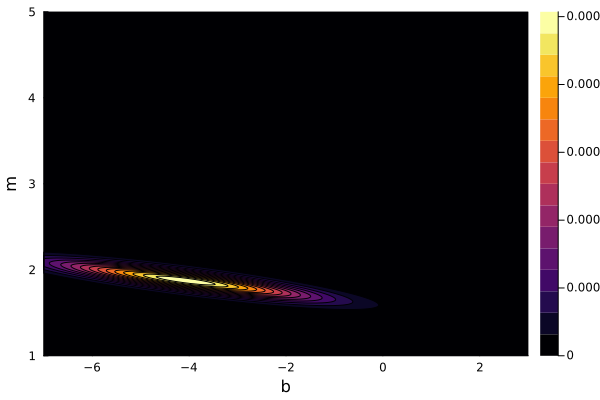

In [35]:
x_new = 0:1:10
sigma_5 = 5
noise = Random.rand(di.Normal(0,sigma_5),length(x_new))
y_true = 3 .* x_new .- 2
y_observed = y_true .+ noise;
contourf(b_range, m_range, p_chi2poly, xlabel = "b", ylabel = "m")

The graph is more to the left and lower than the original graph. Most notably, there is no intensity in the center of the graph.

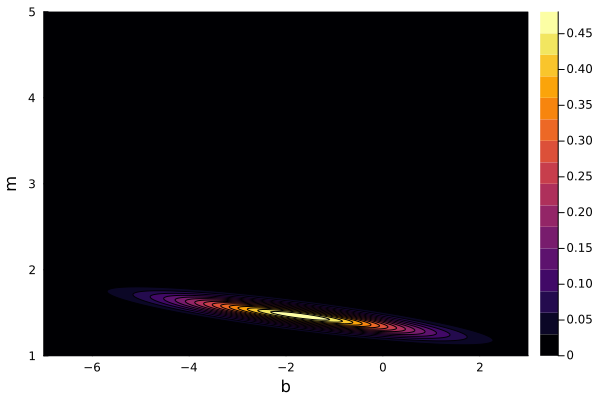

In [36]:
x_new = 0:1:10
sigma_1 = 1
noise = Random.rand(di.Normal(0,sigma_1),length(x_new))
y_true = 3 .* x_new .- 2
y_observed = y_true .+ noise;
contourf(b_range, m_range, p_chi2poly, xlabel = "b", ylabel = "m")

This graph has the highest intensity out of all of the graphs in the center. 